# Build a TextCNN  model

In this notebook, we are going to build a Convolutional Neural Network model according to the following paper: https://arxiv.org/pdf/1408.5882.pdf. The model will be trained on the top of the pre-trained Glove embeddings.

#### Convolution

Convolutional neural networks  (CNN)  utilize layers with convolving features detectors, also referred to as kernels or filters that are applied to the input image or previous convolution layer output. The filter moves through the entire image with the stride of 1, at each step the element-wise multiplication and then the sum is calculated between all the values of the image that are encompassed by the current kernel position and the filters values. The map that results from that operation is called the feature map. By using different kernels we can obtain many feature maps that will build the convolutional layer.

By applying the feature detector, we:
- get rid of some unnecessary information,
- can reduce the size of the image,
- detect features,
- take into consideration that given features can appear in a different part of the image.
<br>
<br>
<div>
<img src="assets/An-example-of-convolution-operation-in-2D-2.png" width="450" />
<div/>
<p style='text-align: center;'>Convolution operation [by Ihab S. Mohamed, https://www.researchgate.net/figure/An-example-of-convolution-operation-in-2D-2_fig3_324165524]</p>
<br>
    
#### ReLU layer

On top of the convolutional layer, we have to apply the ReLU function to increase the non-linearity in our model. Feature detectors can contain negative values, so to get rid of them and at the same time prevent the model from interpreting changes from positive to negative values in our image as linear dependant we will apply the ReLU function.
<br>
#### Max Pooling layer

Spatial invariance is the feature of neural network thanks to which the model is capable of recognizing the same features even if they are a bit different, have different texture, shape or orientation. The max-pooling operation simply takes the maximum value from the max-pooling box that is applied to the feature map. High numbers on the feature map are representing the high similarity to given feature, so by taking the maximum values we will get rid of irrelevant features, and at the same time because we take the maximum from for example the 2x2 box we enable spatial invariance of the model because it doesn't matter if the feature is located on the top left corner or bottom right corner of the max-pooling box we still are able to extract that feature.
<br>
<br>
<div>
<img src="assets/MaxpoolSample2.png" width="400" />
<div/>
<p style='text-align: center;'>Max-pooling operation [https://computersciencewiki.org/index.php/Max-pooling_/_Pooling]</p>
<br>

#### Model's architecture


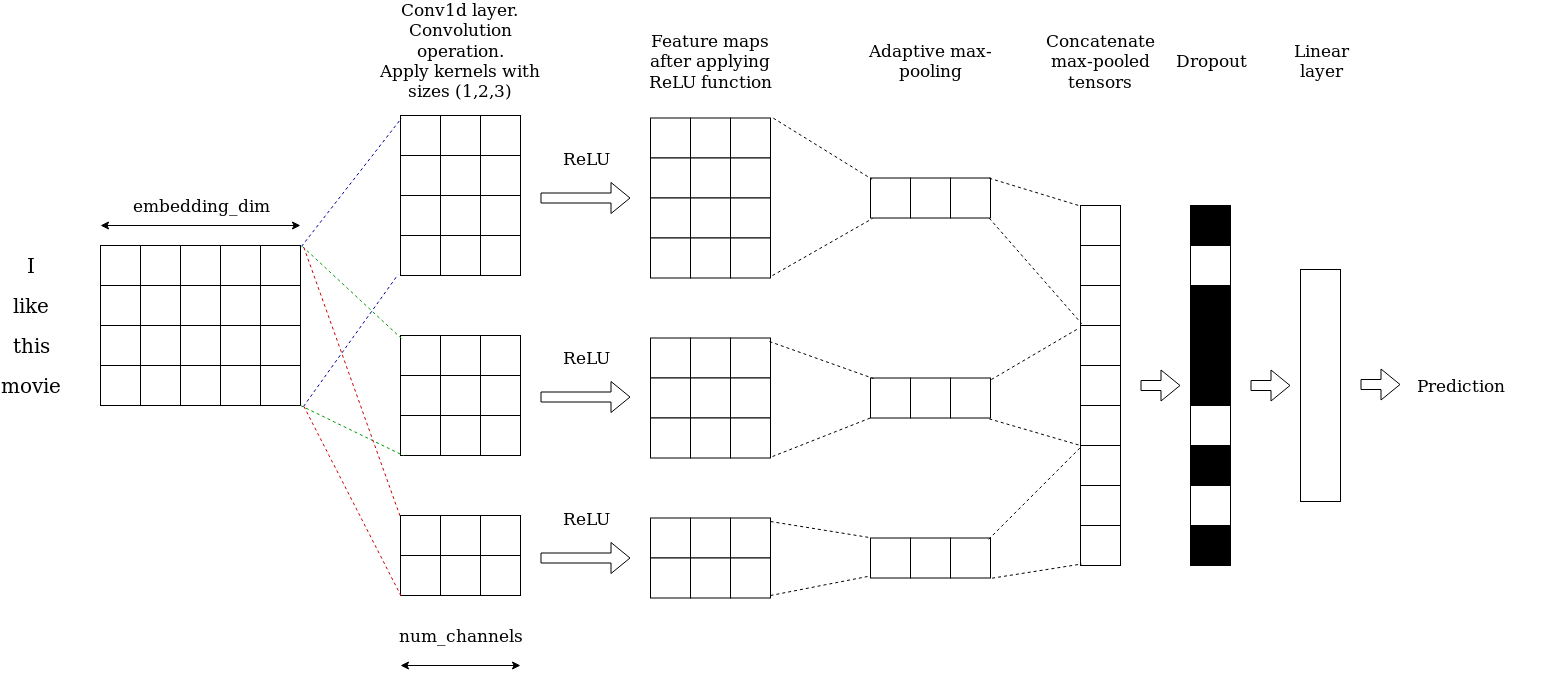

The convolution layer consists of feature maps that are created based on the input word embeddings by performing convolution operations using multiple filter sizes. Using different kernel sizes enable the model to find different features (n-grams). Next, the adaptive max-pooling is applied to the convolving output after going through the ReLU activation function. Max-pooled tensors are concatenated and pass on to the dropout layer, and then to the linear layer.

### Building and training the model

<p>Let's start with importing all indispensable libraries.</p>

In [1]:
from batch_iterator import BatchIterator
from early_stopping import EarlyStopping
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import device
from tqdm import tqdm_notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix